In [25]:
import scanpy as sc
from pathlib import Path
import numpy as np
import pandas as pd 

In [26]:
path_to_data = Path("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/citeseq/")

In [27]:
citeseq_prot = sc.read_h5ad(path_to_data / "CITEseq_protein.h5ad")
citeseq_rna = sc.read_h5ad(path_to_data / "CITEseq_rna.h5ad")

/home/icb/alessandro.palma/miniconda3/envs/sc_exp_design/lib/python3.10/site-packages/anndata/compat/__init__.py:363: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [28]:
citeseq_prot

AnnData object with n_obs × n_vars = 42929 × 192
    obs: 'barcode', 'donor_id', 'subproject', 'gem_id', 'assay', 'sex', 'age', 'age_group', 'hospital', 'nCount_RNA', 'nCount_ADT', 'nFeature_ADT', 'nFeature_RNA', 'pct_mt', 'pct_ribosomal', 'scrublet_doublet_scores', 'scrublet_predicted_doublet', 'S.Score', 'G2M.Score', 'Phase', 'UMAP_1_20220215', 'UMAP_2_20220215', 'bcr_flag', 'tcr_flag', 'RNA.weight', 'ADT.weight', 'annotation_figure_1', 'annotation_prob', 'UMAP_1_level_1', 'UMAP_2_level_1'
    var: 'features'
    obsm: 'X_adt.umap', 'X_apca', 'X_harmony_protein', 'X_rna.umap', 'X_wnn.umap'
    varm: 'APCA', 'HARMONY_PROTEIN'

In [29]:
citeseq_rna

AnnData object with n_obs × n_vars = 42929 × 2000
    obs: 'barcode', 'donor_id', 'subproject', 'gem_id', 'assay', 'sex', 'age', 'age_group', 'hospital', 'nCount_RNA', 'nCount_ADT', 'nFeature_ADT', 'nFeature_RNA', 'pct_mt', 'pct_ribosomal', 'scrublet_doublet_scores', 'scrublet_predicted_doublet', 'S.Score', 'G2M.Score', 'Phase', 'UMAP_1_20220215', 'UMAP_2_20220215', 'bcr_flag', 'tcr_flag', 'RNA.weight', 'ADT.weight', 'annotation_figure_1', 'annotation_prob', 'UMAP_1_level_1', 'UMAP_2_level_1'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_adt.umap', 'X_harmony_RNA', 'X_pca', 'X_rna.umap', 'X_wnn.umap'
    varm: 'HARMONY_RNA', 'PCs'
    obsp: 'distances'

## Check proteins first

In [30]:
np.unique(citeseq_prot.obs.annotation_figure_1)

array(['Activated NBC', 'CD4 T', 'CD8 T', 'DC', 'DN', 'FDC', 'GCBC',
       'Granulocytes', 'ILC', 'MBC', 'Mast', 'Mono/Macro', 'NBC', 'NK',
       'Naive CD4 T', 'Naive CD8 T', 'PC', 'PDC', 'cycling FDC',
       'cycling T', 'cycling myeloid', 'epithelial', 'preB/T'],
      dtype=object)

The annotations are the same as in the other datasets 

In [31]:
citeseq_prot.X

array([[ 0.26946658,  3.24512104, -0.23117847, ...,  0.06316116,
         0.76906077, -0.76375563],
       [-0.45052892,  1.21636377, -1.19941983, ...,  0.9062405 ,
         0.93532519, -1.80075892],
       [ 1.90426668, -0.58648624,  0.47334416, ..., -0.90006569,
        -0.11742281, -1.80075892],
       ...,
       [ 0.2870565 , -0.58648624,  2.99911641, ..., -0.90006569,
        -0.09855882,  1.74841698],
       [-1.66853274,  1.25373442,  1.24914759, ..., -0.90006569,
         0.02517017, -0.64577869],
       [-0.38278666, -0.58648624, -0.08416452, ..., -0.90006569,
         0.07067069, -0.60630114]])

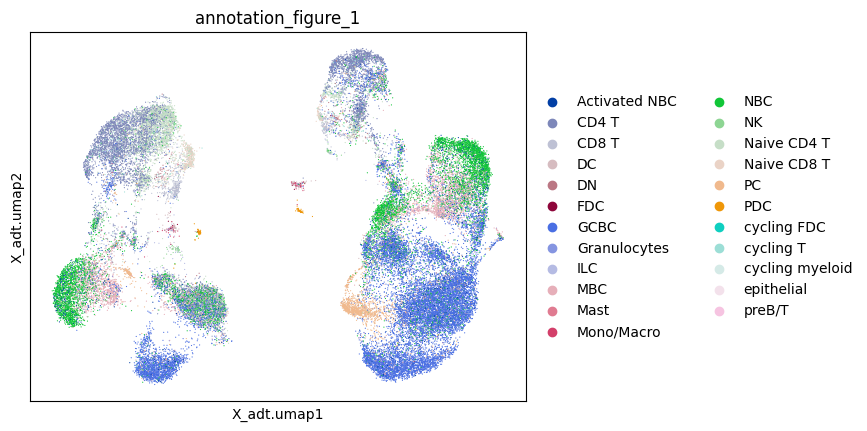

In [32]:
sc.pl.embedding(citeseq_prot, basis="X_adt.umap",  color="annotation_figure_1")

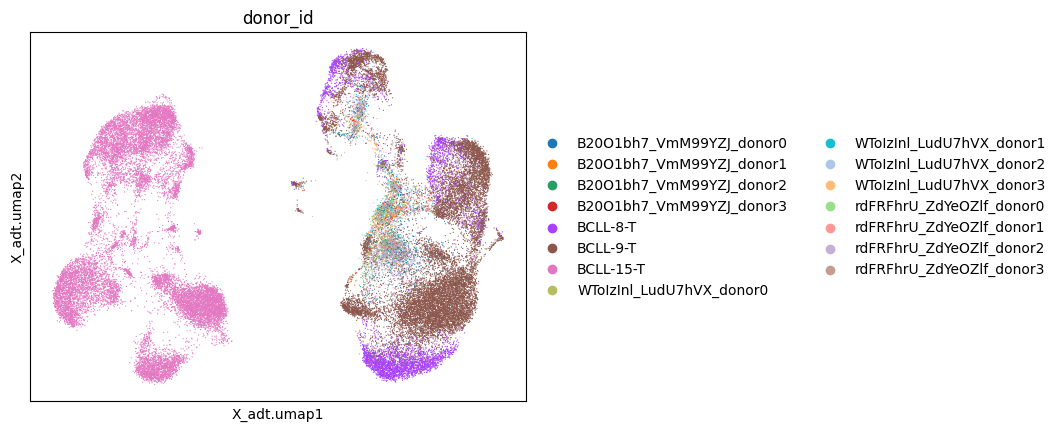

In [33]:
sc.pl.embedding(citeseq_prot, basis="X_adt.umap", color="donor_id")

In [34]:
citeseq_prot.obsm["X_harmony_protein"].shape

(42929, 50)

In [35]:
sc.pp.neighbors(citeseq_prot, use_rep="X_harmony_protein")

In [36]:
sc.tl.umap(citeseq_prot)

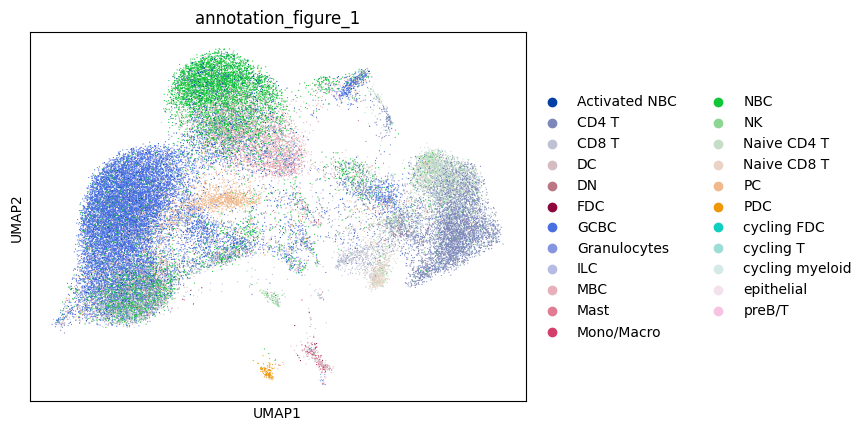

In [37]:
sc.pl.umap(citeseq_prot, color="annotation_figure_1")

In [38]:
citeseq_prot.var

,features
CD80,CD80
CD86,CD86
CD274-(B7-H1--PD-L1),CD274-(B7-H1--PD-L1)
CD273--(B7-DC--PD-L2),CD273--(B7-DC--PD-L2)
CD275-(B7-H2--ICOSL),CD275-(B7-H2--ICOSL)
...,...
Podocalyxin,Podocalyxin
CD224,CD224
1055-anti-c-Met,1055-anti-c-Met
CD258-(LIGHT),CD258-(LIGHT)


## Add scRNA-seq harmony to the cite-seq adata 

In [41]:
citeseq_prot.obsm["X_harmony_RNA"] = citeseq_rna.obsm["X_harmony_RNA"].copy()

In [43]:
citeseq_prot.obsm['X_harmony_RNA']

array([[ 1.66067171,  4.60854738,  0.84108148, ..., -0.41593773,
         0.84728769,  2.22269595],
       [ 2.39815427,  3.28055507, -0.64580411, ..., -0.2639632 ,
         0.11207265, -0.14819369],
       [-3.42607826,  2.14360094, -2.87407426, ...,  0.46413869,
         0.67913103,  0.58204086],
       ...,
       [ 6.2830105 , -6.94153825,  0.15688025, ...,  0.67187849,
         0.19889173, -1.71685595],
       [ 5.37549435, -6.16031339, -0.12070858, ...,  3.43597921,
         0.57471355, -1.52126325],
       [ 6.23314214, -5.71335485,  0.25630535, ...,  0.78580112,
         0.19719654,  0.41225197]])

# Map to codex

In [44]:
cite_to_codex_df = pd.read_csv("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/citeseq/CODEX_to_citeseq_matching.csv",
                              index_col=0)

In [45]:
cite_to_codex_df

,Present in both,CITEseq_feature_name
Codex_Name,,
CCR7,True,CD197-(CCR7)
CD103,True,CD103-(Integrin-alphaE)
CD11b,True,CD11b
CD11c,True,CD11c
CD138,True,CD138-(Syndecan-1)
CD15,True,CD15-(SSEA-1)
CD16,True,CD16
CD163,True,CD163
CD20,True,CD20


In [46]:
# Remove NaN 
cite_to_codex_df = cite_to_codex_df.dropna()

In [47]:
citeseq_prot_subset = citeseq_prot[:, cite_to_codex_df.CITEseq_feature_name]

In [48]:
citeseq_prot_subset.var

,features
CD197-(CCR7),CD197-(CCR7)
CD103-(Integrin-alphaE),CD103-(Integrin-alphaE)
CD11b,CD11b
CD11c,CD11c
CD138-(Syndecan-1),CD138-(Syndecan-1)
CD15-(SSEA-1),CD15-(SSEA-1)
CD16,CD16
CD163,CD163
CD20,CD20
CD206-(MMR),CD206-(MMR)


In [49]:
cite_to_codex_df

,Present in both,CITEseq_feature_name
Codex_Name,,
CCR7,True,CD197-(CCR7)
CD103,True,CD103-(Integrin-alphaE)
CD11b,True,CD11b
CD11c,True,CD11c
CD138,True,CD138-(Syndecan-1)
CD15,True,CD15-(SSEA-1)
CD16,True,CD16
CD163,True,CD163
CD20,True,CD20


The codex and cite-seq protein order is now the same 

In [50]:
# Final DF 
citeseq_prot_subset.var = citeseq_prot_subset.var.drop("features", axis=1)

## Now read and subset codex

In [51]:
raw_dir = Path("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/codex/")
target_dir = Path("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/codex/citeseq/")

In [52]:
adata_codex_healthy = sc.read_h5ad(raw_dir / "cellfeaturization_results_healthy.h5ad")
adata_codex_tonsilitis = sc.read_h5ad(raw_dir / "cellfeaturization_results_tonsilitis.h5ad")

Remove everytning that is not mean 

In [53]:
to_keep = []

for row in adata_codex_tonsilitis.var.index:
    if "mean" in row:
        to_keep.append(row)

In [54]:
adata_codex_healthy = adata_codex_healthy[:, to_keep]
adata_codex_tonsilitis = adata_codex_tonsilitis[:, to_keep]

In [55]:
adata_codex_tonsilitis.shape

(19784, 59)

Add a column with the stain name 

In [56]:
stain_names = []

for row in adata_codex_tonsilitis.var.index:
    stain = row.split("_")[0]
    stain_names.append(stain)

In [57]:
adata_codex_healthy.var["stain_names"] = stain_names
adata_codex_tonsilitis.var["stain_names"] = stain_names

/tmp/ipykernel_2435680/2328323169.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_codex_healthy.var["stain_names"] = stain_names
/tmp/ipykernel_2435680/2328323169.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_codex_tonsilitis.var["stain_names"] = stain_names


In [58]:
adata_codex_healthy.var

,stain_names
DAPI_mean_nucleus,DAPI
CD45_mean_nucleus,CD45
FoxP3_mean_nucleus,FoxP3
HLA-DR_mean_nucleus,HLA-DR
CD103_mean_nucleus,CD103
CHGA_mean_nucleus,CHGA
EGFR_mean_nucleus,EGFR
CD206_mean_nucleus,CD206
GFAP_mean_nucleus,GFAP
PD-1_mean_nucleus,PD-1


In [59]:
adata_codex_healthy.var["feature_name"] = adata_codex_healthy.var.index
adata_codex_tonsilitis.var["feature_name"] = adata_codex_healthy.var.index

adata_codex_healthy.var = adata_codex_healthy.var.set_index("stain_names")
adata_codex_tonsilitis.var = adata_codex_tonsilitis.var.set_index("stain_names")

Subset to the common features 

In [60]:
adata_codex_healthy = adata_codex_healthy[:, cite_to_codex_df.index]
adata_codex_tonsilitis = adata_codex_tonsilitis[:, cite_to_codex_df.index]

## Final check

In [61]:
adata_codex_healthy.var

,feature_name
stain_names,
CCR7,CCR7_mean_nucleus
CD103,CD103_mean_nucleus
CD11b,CD11b_mean_nucleus
CD11c,CD11c_mean_nucleus
CD138,CD138_mean_nucleus
CD15,CD15_mean_nucleus
CD16,CD16_mean_nucleus
CD163,CD163_mean_nucleus
CD20,CD20_mean_nucleus


In [62]:
adata_codex_tonsilitis.var

,feature_name
stain_names,
CCR7,CCR7_mean_nucleus
CD103,CD103_mean_nucleus
CD11b,CD11b_mean_nucleus
CD11c,CD11c_mean_nucleus
CD138,CD138_mean_nucleus
CD15,CD15_mean_nucleus
CD16,CD16_mean_nucleus
CD163,CD163_mean_nucleus
CD20,CD20_mean_nucleus


In [63]:
citeseq_prot_subset.var

""
CD197-(CCR7)
CD103-(Integrin-alphaE)
CD11b
CD11c
CD138-(Syndecan-1)
CD15-(SSEA-1)
CD16
CD163
CD20
CD206-(MMR)


## Save data 

In [64]:
adata_codex_healthy.write_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/codex/citeseq/cellfeaturization_results_healthy_processed.h5ad")
adata_codex_tonsilitis.write_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/codex/citeseq/cellfeaturization_results_tonsilitis_processed.h5ad")

In [65]:
del citeseq_prot_subset.raw

In [66]:
citeseq_prot_subset.write_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/citeseq/CITEseq_protein_processed.h5ad")

Now we match based on marker expression / intensity and transport to HARMONY features. 